Purpose: This file attempts to view if any pattern emerged from PCA analysis and county groupings

# Importing Packages and Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
member_level_df = pd.read_csv('data/Member_Level_Dataset.csv')
member_level_df.head()

,Unique_Member_Identifier,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,...,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,360faa7e8e345d2725f92460ca39696ad885b876805328...,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4ef271022b929dd2ea56f3c0e9a7efae346a07e40f6ea1...,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,f868c8fb32d526c00024e408fdd712e881de936372bef8...,2022-01-31,38,MetroWest,32765,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4fe6ec028a8a5234bb02fbe97488fb9431109a292ee8bc...,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,f46df5083939ce116be51669af3315c474655c936204c2...,2022-01-31,47,East Orlando,32825,3,2,1,0,0,...,0,0,0,0,0,1,2,2,0,1


In [3]:
print(member_level_df['BranchCategory'].unique())

['Winter Garden' 'Lake Nona' 'MetroWest' 'Kissimmee' 'East Orlando'
 'Fern Park' 'Apopka' 'Lake Mary' 'UCF Campus' 'Longwood' 'Oviedo'
 'Clermont' 'St. Cloud' 'Orange City' 'Mills' 'South Orlando' 'Pine Hills'
 'Leesburg' 'Sanford' 'Poinciana' 'Altamonte Springs' 'Virtual Branch'
 'Lake Brantley High School' 'The Loop' 'Boone High School'
 'Poinciana High School' 'Merritt Island' 'Downtown Campus' 'Eustis'
 'Oak Ridge High School' 'St. Cloud High School' 'Lake Howell High School'
 'Timber Creek High School' 'Seminole State' 'Ocoee High School'
 'Colonial High School' 'Edgewater High School']


In [4]:
print(member_level_df['EOM_TRANS_DATE'].unique())

['2022-01-31' '2022-02-28' '2022-03-31' '2022-04-30' '2022-05-31'
 '2022-06-30' '2022-07-31' '2022-08-31' '2022-09-30' '2022-10-31'
 '2022-11-30' '2022-12-31' '2023-01-31' '2023-02-28' '2023-03-31'
 '2023-04-30' '2023-05-31' '2023-06-30' '2023-07-31']


# Data Preprocessing

In [5]:
# Remove the rows that contains 'Virtual Branch' in the 'BranchCategory' column
no_virtual_df = member_level_df[member_level_df['BranchCategory'] != 'Virtual Branch']

In [6]:
# Remove the rows that contains 'High School' in the name in 'BranchCategory' column
no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]

C:\Users\perez\AppData\Local\Temp\ipykernel_24708\2725168190.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_highschool_df = no_virtual_df[~member_level_df['BranchCategory'].str.contains('High School')]


In [7]:
# Drop empty rows
no_highschool_df = no_highschool_df.dropna()

In [8]:
no_highschool_df.head()

,Unique_Member_Identifier,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,...,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,360faa7e8e345d2725f92460ca39696ad885b876805328...,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4ef271022b929dd2ea56f3c0e9a7efae346a07e40f6ea1...,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,f868c8fb32d526c00024e408fdd712e881de936372bef8...,2022-01-31,38,MetroWest,32765,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4fe6ec028a8a5234bb02fbe97488fb9431109a292ee8bc...,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,f46df5083939ce116be51669af3315c474655c936204c2...,2022-01-31,47,East Orlando,32825,3,2,1,0,0,...,0,0,0,0,0,1,2,2,0,1


In [9]:
no_highschool_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620529 entries, 0 to 1661363
Data columns (total 22 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Unique_Member_Identifier  1620529 non-null  object
 1   EOM_TRANS_DATE            1620529 non-null  object
 2   age                       1620529 non-null  int64 
 3   BranchCategory            1620529 non-null  object
 4   address_zip               1620529 non-null  object
 5   n_accts                   1620529 non-null  int64 
 6   n_checking_accts          1620529 non-null  int64 
 7   n_savings_accts           1620529 non-null  int64 
 8   n_open_loans              1620529 non-null  int64 
 9   n_open_cds                1620529 non-null  int64 
 10  n_open_club_accts         1620529 non-null  int64 
 11  n_open_credit_cards       1620529 non-null  int64 
 12  ATMCount                  1620529 non-null  int64 
 13  BillPaymentCount          1620529 non-null  int

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
no_highschool_df.describe()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
count,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000,1620529.000
mean,49.742,2.524,0.939,1.324,0.177,0.220,0.041,0.070,0.033,0.072,0.017,0.082,0.298,0.049,0.484,0.147,0.000,1.049
std,20.408,1.321,0.620,0.713,0.446,0.842,0.198,0.256,0.210,0.368,0.141,0.461,0.735,0.254,1.103,0.670,0.020,1.043
min,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,33.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,52.000,2.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,66.000,3.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,111.000,34.000,7.000,17.000,4.000,32.000,2.000,1.000,12.000,59.000,9.000,12.000,43.000,28.000,78.000,74.000,3.000,56.000


In [11]:
# Displays the number of unique values for each column
no_highschool_df.nunique().sort_values(ascending=False)

Unique_Member_Identifier    110564
address_zip                   3860
age                            109
DividendCount                   46
Home_Banking                    40
Credit_DebitCount               40
ACHCount                        34
n_accts                         29
n_open_cds                      27
BranchCategory                  26
BillPaymentCount                24
EOM_TRANS_DATE                  19
FeeCount                        17
n_savings_accts                 15
DraftCount                      13
ATMCount                        12
CashCount                        9
n_checking_accts                 8
n_open_loans                     5
WireCount                        4
n_open_club_accts                3
n_open_credit_cards              2
dtype: int64

In [12]:
# Mapping dictionary with proper case
city_to_county_mapping = {
    'Addition Financial Arena': 'Orange',
    'Altamonte Springs': 'Seminole',
    'Apopka': 'Orange',
    'Clermont': 'Lake',
    'Downtown Campus': 'Orange',
    'East Orlando': 'Orange',
    'Eustis': 'Lake',
    'Fern Park': 'Seminole',
    'Kissimmee': 'Osceola',
    'Lake Mary': 'Seminole',
    'Lake Nona': 'Orange',
    'Leesburg': 'Lake',
    'Longwood': 'Seminole',
    'Merritt Island': 'Brevard',
    'MetroWest': 'Orange',
    'Mills': 'Orange',
    'Orange City': 'Volusia',
    'Oviedo': 'Seminole',
    'Pine Hills': 'Orange',
    'Poinciana': 'Polk',
    'Sanford': 'Seminole',
    'Seminole State': 'Seminole',
    'South Orlando': 'Orange',
    'St. Cloud': 'Osceola',
    'The Loop': 'Osceola',
    'UCF Campus': 'Orange',
    'UCF Commons': 'Orange',
    'Winter Garden': 'Orange'
}

county_df = no_highschool_df.copy()

# Add a 'County' column based on the 'BranchCategory' column
county_df['County'] = county_df['BranchCategory'].map(city_to_county_mapping)

# Identify any rows where the county couldn't be mapped
unmapped_rows = county_df[county_df['County'].isnull()]
print(unmapped_rows)

Empty DataFrame
Columns: [Unique_Member_Identifier, EOM_TRANS_DATE, age, BranchCategory, address_zip, n_accts, n_checking_accts, n_savings_accts, n_open_loans, n_open_cds, n_open_club_accts, n_open_credit_cards, ATMCount, BillPaymentCount, CashCount, DraftCount, ACHCount, FeeCount, Credit_DebitCount, Home_Banking, WireCount, DividendCount, County]
Index: []

[0 rows x 23 columns]


In [13]:
county_df.head()

,Unique_Member_Identifier,EOM_TRANS_DATE,age,BranchCategory,address_zip,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,...,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount,County
0,360faa7e8e345d2725f92460ca39696ad885b876805328...,2022-01-31,85,Winter Garden,34760,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Orange
1,4ef271022b929dd2ea56f3c0e9a7efae346a07e40f6ea1...,2022-01-31,59,Lake Nona,34771,2,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Orange
2,f868c8fb32d526c00024e408fdd712e881de936372bef8...,2022-01-31,38,MetroWest,32765,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Orange
3,4fe6ec028a8a5234bb02fbe97488fb9431109a292ee8bc...,2022-01-31,67,Kissimmee,34744,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Osceola
4,f46df5083939ce116be51669af3315c474655c936204c2...,2022-01-31,47,East Orlando,32825,3,2,1,0,0,...,0,0,0,0,1,2,2,0,1,Orange


Attempting to cluster the different counties and view what pattern emerges.

In [14]:
# Drop unnecessary columns
data_for_clustering = county_df.drop(['Unique_Member_Identifier', 'EOM_TRANS_DATE', 'BranchCategory', 'address_zip', 'County'], axis=1)
data_for_clustering.head()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,85,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,59,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,38,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,67,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,47,3,2,1,0,0,0,0,0,0,0,0,0,1,2,2,0,1


In [15]:
# # Group by county and average the values
# data_for_clustering = data_for_clustering.groupby('County').sum()
# data_for_clustering.head()

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
normalized_df = scaler.fit_transform(data_for_clustering)
normalized_df = pd.DataFrame(normalized_df, columns=data_for_clustering.columns)
# normalized_df.columns = [col + '_norm' for col in normalized_df.columns]
normalized_df.index = data_for_clustering.index
normalized_df.head()

,age,n_accts,n_checking_accts,n_savings_accts,n_open_loans,n_open_cds,n_open_club_accts,n_open_credit_cards,ATMCount,BillPaymentCount,CashCount,DraftCount,ACHCount,FeeCount,Credit_DebitCount,Home_Banking,WireCount,DividendCount
0,1.728,-1.154,-1.515,-0.454,-0.396,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
1,0.454,-0.396,0.098,-0.454,-0.396,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
2,-0.575,-0.396,-1.515,-0.454,-0.396,-0.261,4.843,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
3,0.846,-1.154,-1.515,-0.454,1.844,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,-0.194,-0.439,-0.219,-0.019,-0.047
4,-0.134,0.361,1.711,-0.454,-0.396,-0.261,-0.205,-0.275,-0.157,-0.195,-0.120,-0.177,-0.406,3.740,1.375,2.763,-0.019,-0.047


# PCA Analysis

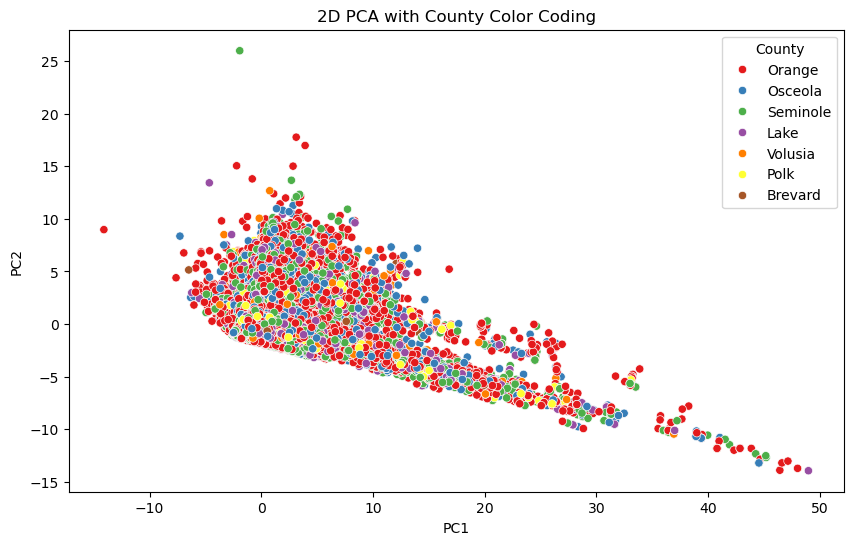

In [17]:
# Apply 2D PCA
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(normalized_df)

# Create a DataFrame for 2D PCA results
pca_df_2d = pd.DataFrame(data=pca_result_2d, columns=['PC1', 'PC2'])
pca_df_2d['County'] = county_df['County']

# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='County', data=pca_df_2d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

In [18]:
# Get the feature loadings for PC1 and PC2
loadings_df = pd.DataFrame(pca_2d.components_, columns=normalized_df.columns, index=['PC1', 'PC2'])

# Display the feature loadings
print("Feature Loadings for PC1:")
print(loadings_df.loc['PC1'].sort_values(ascending=False))

print("\nFeature Loadings for PC2:")
print(loadings_df.loc['PC2'].sort_values(ascending=False))

Feature Loadings for PC1:
n_accts                0.570
DividendCount          0.489
n_open_cds             0.462
n_savings_accts        0.275
n_checking_accts       0.263
age                    0.178
n_open_credit_cards    0.125
n_open_loans           0.093
ACHCount               0.053
Home_Banking           0.035
n_open_club_accts      0.019
BillPaymentCount       0.014
CashCount              0.007
WireCount              0.001
DraftCount            -0.016
ATMCount              -0.044
Credit_DebitCount     -0.062
FeeCount              -0.109
Name: PC1, dtype: float64

Feature Loadings for PC2:
n_open_loans           0.570
n_open_credit_cards    0.565
n_checking_accts       0.268
ACHCount               0.246
age                    0.214
Credit_DebitCount      0.172
Home_Banking           0.154
BillPaymentCount       0.150
ATMCount               0.095
DraftCount             0.075
CashCount              0.055
FeeCount               0.045
WireCount              0.005
n_accts               

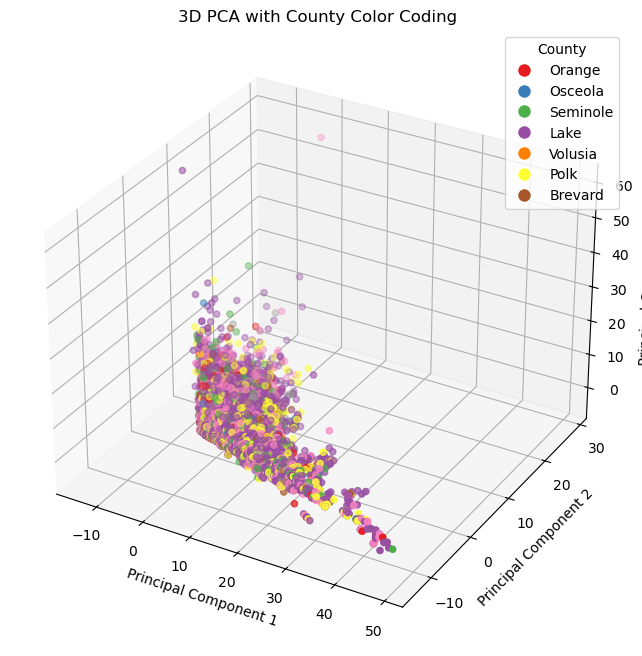

In [24]:
# Apply 3D PCA
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(normalized_df)

# Create a DataFrame for 3D PCA results
pca_df_3d = pd.DataFrame(data=pca_result_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['County'] = county_df['County']

# Plot 3D PCA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['County'].astype('category').cat.codes, cmap='Set1')

# Create a legend
legend_labels = county_df['County'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette('Set1')[i], markersize=10, label=label) for i, label in enumerate(legend_labels)]
ax.legend(handles=legend_handles, title='County', loc='upper right')

ax.set_title('3D PCA with County Color Coding')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

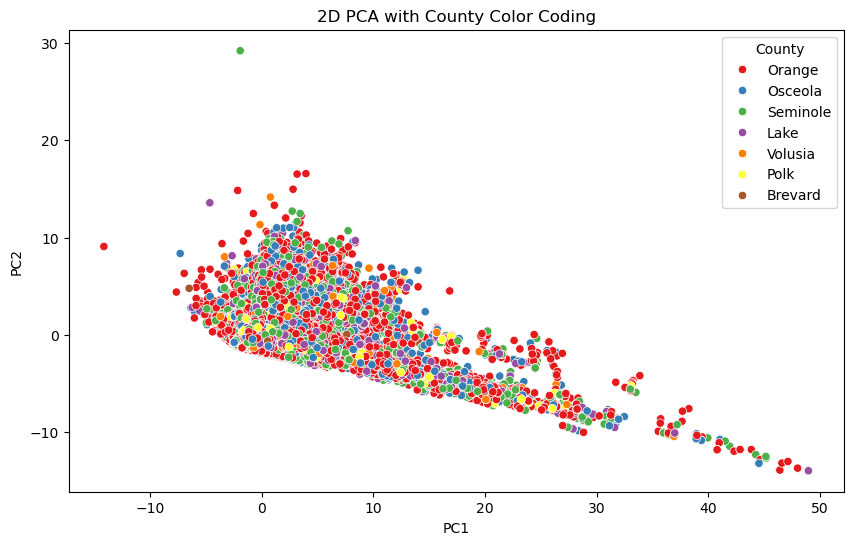

In [20]:
# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='County', data=pca_df_3d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

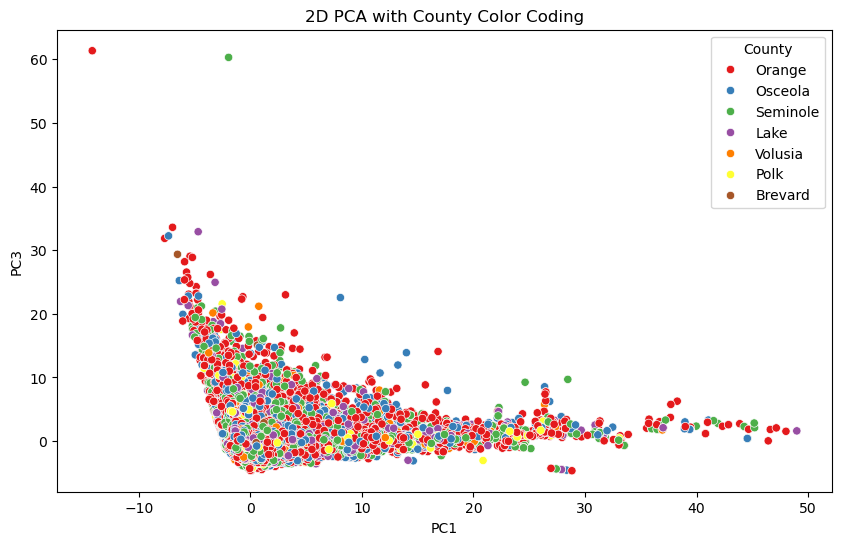

In [21]:
# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC3', hue='County', data=pca_df_3d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

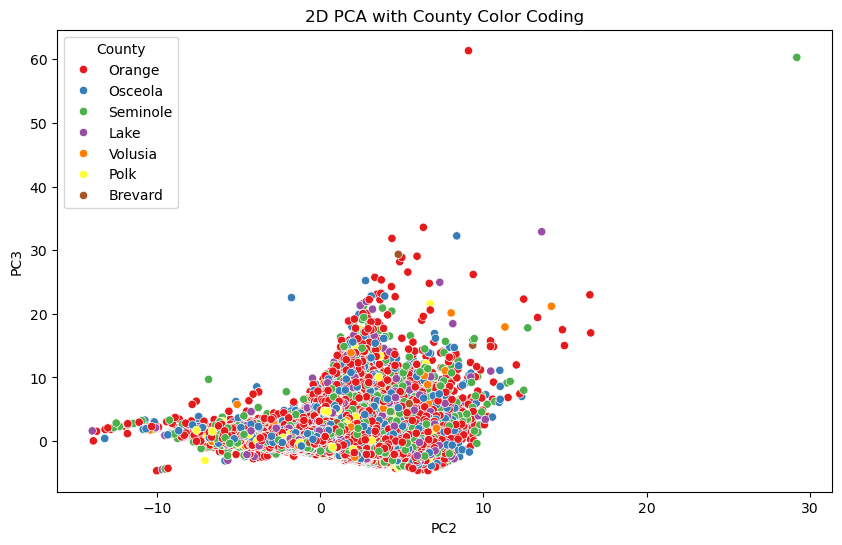

In [22]:
# Plot 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC3', hue='County', data=pca_df_3d, palette='Set1')
plt.title('2D PCA with County Color Coding')
plt.show()

In [23]:
# Get the feature loadings for PC1, PC2, and PC3
loadings_df = pd.DataFrame(pca_3d.components_, columns=normalized_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the feature loadings
print("Feature Loadings for PC1:")
print(loadings_df.loc['PC1'].sort_values(ascending=False))

print("\nFeature Loadings for PC2:")
print(loadings_df.loc['PC2'].sort_values(ascending=False))

print("\nFeature Loadings for PC3:")
print(loadings_df.loc['PC3'].sort_values(ascending=False))

Feature Loadings for PC1:
n_accts                0.570
DividendCount          0.489
n_open_cds             0.462
n_savings_accts        0.275
n_checking_accts       0.263
age                    0.178
n_open_credit_cards    0.125
n_open_loans           0.093
ACHCount               0.052
Home_Banking           0.036
n_open_club_accts      0.020
BillPaymentCount       0.014
CashCount              0.008
WireCount              0.001
DraftCount            -0.016
ATMCount              -0.044
Credit_DebitCount     -0.062
FeeCount              -0.109
Name: PC1, dtype: float64

Feature Loadings for PC2:
n_open_loans           0.572
n_open_credit_cards    0.567
n_checking_accts       0.268
ACHCount               0.246
age                    0.211
Credit_DebitCount      0.164
BillPaymentCount       0.160
Home_Banking           0.148
ATMCount               0.086
DraftCount             0.074
CashCount              0.047
FeeCount               0.046
WireCount              0.019
n_open_club_accts     